In [170]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

def imshow(image):
    plt.imshow(image)

def imshow_grayscale(image, extent=None):
    plt.imshow(image, cmap="gray", extent=extent)

%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
from ps1_python.find_circles import find_circles
from ps1_python.hough_circles_acc import hough_circles_acc
from ps1_python.hough_lines_acc import hough_lines_acc
from ps1_python.hough_lines_draw import hough_lines_draw
from ps1_python.hough_peaks import hough_peaks

> Load the input grayscale image (input/ps1-input0.png) as img and generate an edge image – which is a binary image with white pixels (1) on the edges and black pixels (0) elsewhere

128 240 16


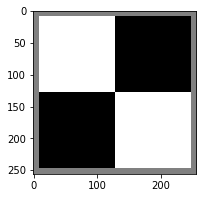

In [108]:
figsize(3, 3)
im = cv2.imread("ps1_python/input/ps1-input0.png", cv2.IMREAD_GRAYSCALE)
imshow_grayscale(im)
print(im[0, 0], im[50, 50], im[50, 200])

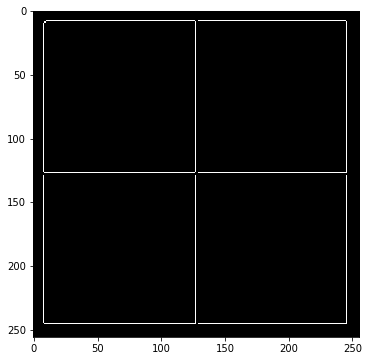

In [110]:
figsize(6, 6)
c = cv2.Canny(im, 10, 200)  # all the threshold params I tried work
imshow_grayscale(c)


> Implement a Hough Transform method for finding lines.

> a) Write a function hough_lines_acc that computes the Hough Transform for lines and produces an accumulator array. 

In [111]:
np.sum(c > 0)

1406

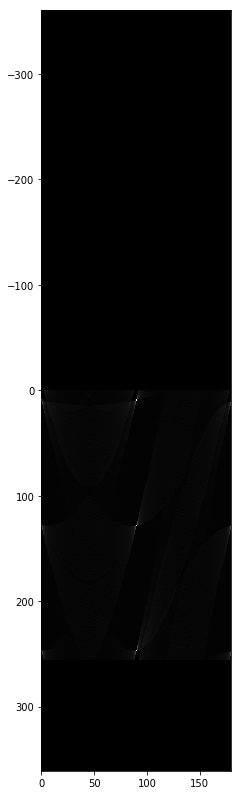

In [175]:
figsize(14, 14)
h, max_rho = hough_lines_acc(c)
imshow_grayscale(h, extent=(0, 180, max_rho, -max_rho))


In [171]:
sorted([(x, rh-max_rho, th) for (rh, th), x in np.ndenumerate(h)], reverse=True)[:20]


[(255, 246, 90),
 (255, 246, 0),
 (254, 128, 90),
 (254, 128, 0),
 (252, 9, 90),
 (252, 9, 0),
 (65, 247, 89),
 (65, 247, 1),
 (65, 129, 89),
 (65, 129, 1),
 (64, 248, 179),
 (64, 243, 91),
 (64, 131, 179),
 (64, 131, 89),
 (64, 131, 1),
 (64, 129, 179),
 (64, 127, 91),
 (64, 125, 91),
 (64, 13, 179),
 (64, 12, 89)]

> b) Write a function hough_peaks that finds indices of the accumulator array (here line parameters) that correspond to local maxima. 

[(246, 0), (246, 90), (128, 0), (128, 90), (9, 0), (9, 90)]

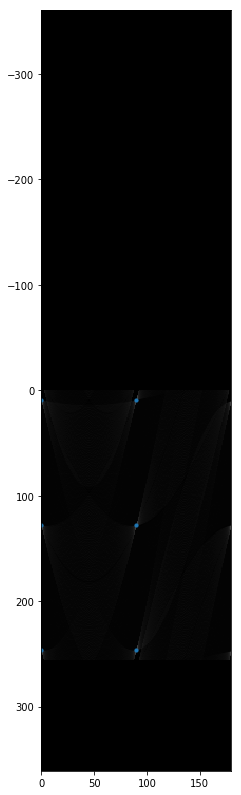

In [189]:
figsize(14, 14)

peaks = hough_peaks(h, 10)
peaks = [(rh-max_rho, th) for rh, th in peaks]

fig = plt.figure()
imshow_grayscale(h, extent=(0, 180, max_rho, -max_rho))
y, x = zip(*peaks)
plt.scatter(x, y, s=10)
plt.gca().set_xlim(0, 180)

peaks


> c) Write a function hough_lines_draw to draw color lines that correspond to peaks found in the accumulator array.

(0, 256)

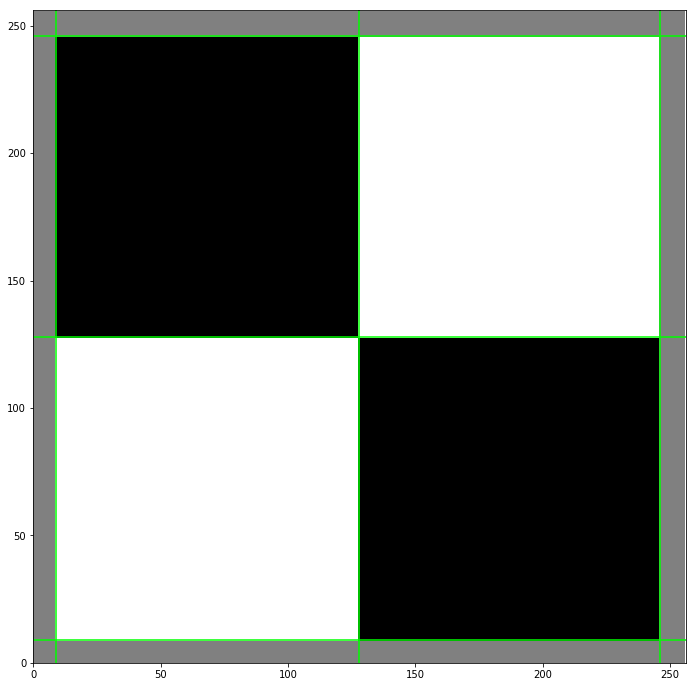

In [203]:
figsize(12, 12)

imshow_grayscale(im)
hough_lines_draw(im, peaks)

plt.gca().set_xlim(0, im.shape[1])
plt.gca().set_ylim(0, im.shape[0])